# Instalação de Dependências
Instalando as bibliotecas necessárias para o projeto.

In [2]:
!pip install d2l
!pip install gdown
!pip install py7zr

You should consider upgrading via the 'C:\Users\cazem\.pyenv\pyenv-win\versions\3.9.13\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cazem\.pyenv\pyenv-win\versions\3.9.13\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cazem\.pyenv\pyenv-win\versions\3.9.13\python.exe -m pip install --upgrade pip' command.


# Importação de Bibliotecas
Importando as bibliotecas que serão utilizadas no projeto.

In [3]:
import collections
import math
import os
import shutil
import pandas as pd
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
import gdown
import zipfile

# Download e Extração de Dados
Baixando o arquivo ZIP e extraindo o conteúdo.

In [6]:
file_id = '1uEK7_Clba2YIZVfJRHIToRY3AZDxdjUz'
destination = 'data.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall('./data/cifar-10')

Downloading...
From (original): https://drive.google.com/uc?id=1uEK7_Clba2YIZVfJRHIToRY3AZDxdjUz
From (redirected): https://drive.google.com/uc?id=1uEK7_Clba2YIZVfJRHIToRY3AZDxdjUz&confirm=t&uuid=852908e6-98c3-44e1-bac4-438dc750f029
To: c:\Users\cazem\Documents\Projetos\INTELI-activities\m10\semana_7\Classificação de Imagens (CIFAR-10)\data.zip
100%|██████████| 750M/750M [10:47<00:00, 1.16MB/s]


# Extração de Arquivos .7z
Descompactando arquivos .7z dentro do diretório de dados.

In [7]:
import py7zr

def extract_7z(file_path, extract_path):
    with py7zr.SevenZipFile(file_path, mode='r') as z:
        z.extractall(path=extract_path)

file_7z_1 = './data/cifar-10/train.7z'
file_7z_2 = './data/cifar-10/test.7z'
extract_dir_7z_1 = './data/cifar-10/'
extract_dir_7z_2 = './data/cifar-10/'

os.makedirs(extract_dir_7z_1, exist_ok=True)
os.makedirs(extract_dir_7z_2, exist_ok=True)

extract_7z(file_7z_1, extract_dir_7z_1)
extract_7z(file_7z_2, extract_dir_7z_2)

extracted_files_1 = os.listdir(extract_dir_7z_1)
extracted_files_2 = os.listdir(extract_dir_7z_2)
print('Arquivos extraídos do arquivo1.7z:', extracted_files_1)
print('Arquivos extraídos do arquivo2.7z:', extracted_files_2)

Arquivos extraídos do arquivo1.7z: ['sampleSubmission.csv', 'test', 'test.7z', 'train', 'train.7z', 'trainLabels.csv']
Arquivos extraídos do arquivo2.7z: ['sampleSubmission.csv', 'test', 'test.7z', 'train', 'train.7z', 'trainLabels.csv']


# Organização dos Dados
Organizando os dados de treino e validação.

In [8]:
d2l.DATA_HUB['cifar10_tiny'] = (d2l.DATA_URL + 'kaggle_cifar10_tiny.zip',
                                '2068874e4b9a9f0fb07ebe0ad2b29754449ccacd')

# If you use the full dataset downloaded for the Kaggle competition, set
# `demo` to False
demo = False

if demo:
    data_dir = d2l.download_extract('cifar10_tiny')
else:
    data_dir = './data/cifar-10/'

def read_csv_labels(fname):
    """Read fname to return a name to label dictionary."""
    with open(fname, 'r') as f:
        # Skip the file header line (column name)
        lines = f.readlines()[1:]
    tokens = [l.rstrip().split(',') for l in lines]
    return dict(((name, label) for name, label in tokens))

labels = read_csv_labels(os.path.join(data_dir, 'trainLabels.csv'))
print('# training examples:', len(labels))
print('# classes:', len(set(labels.values())))

def copyfile(filename, target_dir):
    """Copy a file into a target directory."""
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(filename, target_dir)


def reorg_train_valid(data_dir, labels, valid_ratio):
    # The number of examples of the class with the least examples in the
    # training dataset
    n = collections.Counter(labels.values()).most_common()[-1][1]
    # The number of examples per class for the validation set
    n_valid_per_label = max(1, math.floor(n * valid_ratio))
    label_count = {}
    for train_file in os.listdir(os.path.join(data_dir, 'train')):
        label = labels[train_file.split('.')[0]]
        fname = os.path.join(data_dir, 'train', train_file)
        # Copy to train_valid_test/train_valid with a subfolder per class
        copyfile(fname, os.path.join(data_dir, 'train_valid_test',
                                     'train_valid', label))
        if label not in label_count or label_count[label] < n_valid_per_label:
            # Copy to train_valid_test/valid
            copyfile(fname, os.path.join(data_dir, 'train_valid_test',
                                         'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            # Copy to train_valid_test/train
            copyfile(fname, os.path.join(data_dir, 'train_valid_test',
                                         'train', label))
    return n_valid_per_label

def reorg_test(data_dir):
    for test_file in os.listdir(os.path.join(data_dir, 'test')):
        copyfile(os.path.join(data_dir, 'test', test_file),
                 os.path.join(data_dir, 'train_valid_test', 'test',
                              'unknown'))
def reorg_cifar10_data(data_dir, valid_ratio):
    labels = read_csv_labels(os.path.join(data_dir, 'trainLabels.csv'))
    reorg_train_valid(data_dir, labels, valid_ratio)
    reorg_test(data_dir)

batch_size = 4 if demo else 128
valid_ratio = 0.1
reorg_cifar10_data(data_dir, valid_ratio)

# training examples: 50000
# classes: 10


# Pré-processamento dos Dados
Aplicando transformações nos dados de treino e teste.

In [8]:
transform_train = torchvision.transforms.Compose([
    torchvision.transforms.Resize(40),
    torchvision.transforms.RandomResizedCrop(32, scale=(0.64, 1.0), ratio=(1.0, 1.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

train_ds, train_valid_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train_valid_test', folder),
    transform=transform_train) for folder in ['train', 'train_valid']]

valid_ds, test_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train_valid_test', folder),
    transform=transform_test) for folder in ['valid', 'test']]

train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

# Definição do Modelo
Definindo a arquitetura do modelo de rede neural.

In [9]:
def get_net():
    num_classes = 10
    net = d2l.resnet18(num_classes, 3)
    return net

loss = nn.CrossEntropyLoss(reduction="none")

# Treinamento do Modelo
Treinando o modelo de rede neural.

c:\Users\cazem\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


IndexError: list index out of range

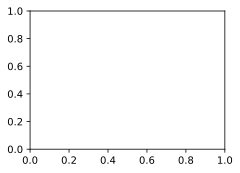

In [10]:
def train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
          lr_decay):
    trainer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9,
                              weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_period, lr_decay)
    num_batches, timer = len(train_iter), d2l.Timer()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'valid acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        net.train()
        metric = d2l.Accumulator(3)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = d2l.train_batch_ch13(net, features, labels,
                                          loss, trainer, devices)
            metric.add(l, acc, labels.shape[0])
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[2], metric[1] / metric[2],
                              None))
        if valid_iter is not None:
            valid_acc = d2l.evaluate_accuracy_gpu(net, valid_iter)
            animator.add(epoch + 1, (None, None, valid_acc))
        scheduler.step()
    if valid_iter is not None:
        print(f'loss {metric[0] / metric[2]:.3f}, '
              f'train acc {metric[1] / metric[2]:.3f}, '
              f'valid acc {valid_acc:.3f}')
    else:
        print(f'loss {metric[0] / metric[2]:.3f}, '
              f'train acc {metric[1] / metric[2]:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(devices)}')

devices, num_epochs, lr, wd = d2l.try_all_gpus(), 5, 0.1, 5e-4
lr_period, lr_decay, net = 50, 0.1, get_net()
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
      lr_decay)

# Avaliação do Modelo
Avaliando o modelo treinado nos dados de teste.

In [ ]:
net, preds = get_net(), []
train(net, train_valid_iter, None, num_epochs, lr, wd, devices, lr_period,
      lr_decay)

for X, _ in test_iter:
    y_hat = net(X.to(devices[0]))
    preds.extend(y_hat.argmax(dim=1).type(torch.int32).cpu().numpy())
sorted_ids = list(range(1, len(test_ds) + 1))
sorted_ids.sort(key=lambda x: str(x))
df = pd.DataFrame({'id': sorted_ids, 'label': preds})
df['label'] = df['label'].apply(lambda x: train_valid_ds.classes[x])
df.to_csv('submission.csv', index=False)

# Salvar e Baixar o Modelo Treinado
Salvando o modelo treinado e baixando o arquivo salvo.

In [ ]:
model_save_path = 'trained_model.pth'
torch.save(net.state_dict(), model_save_path)

from google.colab import files
files.download(model_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>